# Import libraries

In [42]:
# Padrão
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Others
import openpyxl
import pathlib
import xlrd
import os
import warnings
import statistics
import category_encoders as ce
from math import isnan
from scipy.spatial import ConvexHull

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity,
                                             calculate_kmo,
                                             chi2)

In [43]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (silhouette_score,
                             accuracy_score,
                             classification_report,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             roc_curve,
                             roc_auc_score,
                             f1_score, auc)
from sklearn.pipeline import make_pipeline

# Regressão
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [44]:
# Algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier         # Decision Tree
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import AdaBoostClassifier         # AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier
from sklearn.svm import SVC                             # Support Vector Machines
from xgboost import XGBClassifier                       # XGBoost
from sklearn.neighbors import KNeighborsClassifier      # KNN or k-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB              # Gaussian Naive Bayes
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.linear_model import Perceptron             # Perceptron
from sklearn.linear_model import SGDClassifier          # Stochastic Gradient Descent
from sklearn.neural_network import MLPClassifier        # Neural Net

In [45]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [46]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

# Import Dataset

In [47]:
df_churn_prediction = pd.read_csv('../Customer-Churn-Prediction/Datasets/Dataset_churn_time1.csv', sep=",", encoding='UTF-8', low_memory=False)
df_churn_prediction.shape

(58504, 97)

In [48]:
df_churn_prediction.head()

,CustomerID,TypeCustomer,subsidiary,state,churn,SitutationContract,Tenure,MonthlyChargesM6,MonthlyChargesM5,MonthlyChargesM4,MonthlyChargesM3,MonthlyChargesM2,MonthlyChargesM1,ServiceIN_M6,ServiceIN_M5,ServiceIN_M4,ServiceIN_M3,ServiceIN_M2,ServiceIN_M1,issueeconomy_M6,issueeconomy_M5,issueeconomy_M4,issueeconomy_M3,issueeconomy_M2,issueeconomy_M1,issuepaymentM6,issuepaymentM5,issuepaymentM4,issuepaymentM3,issuepaymentM2,issuepaymentM1,issuecancelament_M6,issuecancelament_M5,issuecancelament_M4,issuecancelament_M3,issuecancelament_M2,issuecancelament_M1,issuepaper_M6,issuepaper_M5,issuepaper_M4,issuepaper_M3,issuepaper_M2,issuepaper_M1,issuehatingM6,issuehatingM5,issuehatingM4,issuehatingM3,issuehatingM2,issuehatingM1,Discount_billing_M1,Discount_billing_M2,Discount_billing_M3,Discount_billing_M4,Discount_billing_M5,Discount_billing_M6,Billing_without_discount_M1,Billing_without_discount_M2,Billing_without_discount_M3,Billing_without_discount_M4,Billing_without_discount_M5,Billing_without_discount_M6,rewards_program_gain_M1,rewards_program_gain_M2,rewards_program_gain_M3,rewards_program_gain_M4,rewards_program_gain_M5,rewards_program_gain_M6,rewards_program_used_M1,rewards_program_used_M2,rewards_program_used_M3,rewards_program_used_M4,rewards_program_used_M5,rewards_program_used_M6,vlr_rewards_program_gain_M1,vlr_rewards_program_gain_M2,vlr_rewards_program_gain_M3,vlr_rewards_program_gain_M4,vlr_rewards_program_gain_M5,vlr_rewards_program_gain_M6,vlr_rewards_program_used_M1,vlr_rewards_program_used_M2,vlr_rewards_program_used_M3,vlr_rewards_program_used_M4,vlr_rewards_program_used_M5,vlr_rewards_program_used_M6,balance_M1,balance_M2,balance_M3,balance_M4,balance_M5,balance_M6,suggestion_M1,suggestion_M2,suggestion_M3,suggestion_M4,suggestion_M5,suggestion_M6
0,798c8415-8495-eb11-b1ac-002248370f79,PF,5d6c51bf-1cc3-eb11-8235-00224836632e,MG,Yes,canceled,16.000,301.000,159.000,215.000,269.000,1.000,243.000,301.000,159.000,215.000,270.100,-0.100,243.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.000,0.000,307.880,345.850,437.880,426.620,0.000,0.000,352.500,381.840,465.390,477.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22dbe5c4-7bd4-eb11-bacc-000d3ac19589,PF,536c51bf-1cc3-eb11-8235-00224836632e,MG,No,finished,23.000,169.000,262.668,243.000,247.000,210.000,285.000,169.000,262.670,270.090,255.340,265.640,320.710,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,216.790,0.000,452.600,218.280,0.000,0.000,247.680,0.000,482.100,237.110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,77264287-94f0-eb11-94ef-00224836c613,PF,5b6c51bf-1cc3-eb11-8235-00224836632e,MG,No,finished,23.000,83.892,140.000,102.000,107.000,124.000,98.000,71.390,571.350,583.160,285.120,776.800,710.590,0,0,0,0,0,0,0,0,2,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,123.310,111.260,96.690,120.870,97.210,0.000,145.120,130.930,113.790,142.230,108.120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,04527380-e5ca-ec11-a7b5-002248370274,PF,f4f44bec-760e-ed11-b83e-000d3a8924b8,MG,Yes,canceled,9.000,0.000,0.000,153.000,121.800,111.440,0.000,0.000,0.000,206.360,121.800,111.440,-53.360,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,165.510,52.800,72.610,0.000,0.000,0.000,71.580,112.800,113.680,0.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,0.000,44.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55.000,0.000,59.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
4,ef3500ed-6669-eb11-a812-00224836cbcc,PF,6779e284-6399-eb11-b1ac-002248370f79,MG,No,finished,

# Set in dataset

In [49]:
# Quantidade de NULL por variável
pf_null_1 = pd.DataFrame(df_churn_prediction.iloc[:, 0:40].isnull().sum()).reset_index()
pf_null_1.columns.values[0] = "A1"
pf_null_1.columns.values[1] = "A2"
pf_null_2 = pd.DataFrame(df_churn_prediction.iloc[:, 40:80].isnull().sum()).reset_index()
pf_null_2.columns.values[0] = "A1"
pf_null_2.columns.values[1] = "A2"
pf_null_3 = pd.DataFrame(df_churn_prediction.iloc[:, 80:120].isnull().sum()).reset_index()
pf_null_3.columns.values[0] = "A1"
pf_null_3.columns.values[1] = "A2"

pf_null_ = pd.concat([pf_null_1, pf_null_2, pf_null_3], axis=1)
pf_null_

,A1,A2,A1,A2,A1,A2
0,CustomerID,0,issuepaper_M3,0,vlr_rewards_program_used_M2,12917.000
1,TypeCustomer,0,issuepaper_M2,0,vlr_rewards_program_used_M3,12917.000
2,subsidiary,0,issuepaper_M1,0,vlr_rewards_program_used_M4,12917.000
3,state,0,issuehatingM6,0,vlr_rewards_program_used_M5,12917.000
4,churn,0,issuehatingM5,0,vlr_rewards_program_used_M6,12917.000
5,SitutationContract,0,issuehatingM4,0,balance_M1,12917.000
6,Tenure,0,issuehatingM3,0,balance_M2,12917.000
7,MonthlyChargesM6,530,issuehatingM2,0,balance_M3,12917.000
8,MonthlyChargesM5,530,issuehatingM1,0,balance_M4,12917.000
9,MonthlyChargesM4,530,Discount_billing_M1,12146,balance_M5,12917.000


# Replace values missing

In [50]:
lst00 = ['rewards_program_gain_M1', 'rewards_program_gain_M2', 'rewards_program_gain_M3', 'rewards_program_gain_M4', 'rewards_program_gain_M5', 'rewards_program_gain_M6',
'rewards_program_used_M1', 'rewards_program_used_M2', 'rewards_program_used_M3', 'rewards_program_used_M4', 'rewards_program_used_M5', 'rewards_program_used_M6',
'vlr_rewards_program_gain_M1', 'vlr_rewards_program_gain_M2', 'vlr_rewards_program_gain_M3', 'vlr_rewards_program_gain_M4', 
'vlr_rewards_program_gain_M5', 'vlr_rewards_program_gain_M6',
'vlr_rewards_program_used_M1', 'vlr_rewards_program_used_M2', 'vlr_rewards_program_used_M3', 'vlr_rewards_program_used_M4', 
'vlr_rewards_program_used_M5', 'vlr_rewards_program_used_M6',
'balance_M1', 'balance_M2', 'balance_M3', 'balance_M4', 'balance_M5', 'balance_M6',
'suggestion_M1', 'suggestion_M2', 'suggestion_M3', 'suggestion_M4', 'suggestion_M5', 'suggestion_M6']

for name in lst00:
    df_churn_prediction[name] = df_churn_prediction[name].replace(np.nan, 0)

In [51]:
lst01 = ['MonthlyChargesM6', 'MonthlyChargesM5', 'MonthlyChargesM4', 'MonthlyChargesM3', 'MonthlyChargesM2', 'MonthlyChargesM1', 
 'ServiceIN_M6', 'ServiceIN_M5', 'ServiceIN_M4', 'ServiceIN_M3', 'ServiceIN_M2', 'ServiceIN_M1',
 'Discount_billing_M1', 'Discount_billing_M2', 'Discount_billing_M3', 'Discount_billing_M4', 'Discount_billing_M5', 'Discount_billing_M6',
 'Billing_without_discount_M1', 'Billing_without_discount_M2', 'Billing_without_discount_M3', 
 'Billing_without_discount_M4', 'Billing_without_discount_M5', 'Billing_without_discount_M6']

In [52]:
df_columns = []
df_compare = pd.DataFrame(columns = df_columns)

row_index = 0
for name in lst01:
    df_compare.loc[row_index,'Variável'] = name
    df_compare.loc[row_index, 'N'] = df_churn_prediction[name].count()
    df_compare.loc[row_index, 'Min'] = df_churn_prediction[name].min()
    df_compare.loc[row_index, 'Max'] = df_churn_prediction[name].max()
    df_compare.loc[row_index, 'Média'] = df_churn_prediction[name].mean()
    df_compare.loc[row_index, 'Mediana'] = df_churn_prediction[name].median()
    df_compare.loc[row_index, 'Desvio Padrão'] = df_churn_prediction[name].std()
    df_compare.loc[row_index, 'Equal 0'] = len(df_churn_prediction[df_churn_prediction[name] == 0])
    row_index+=1

df_compare.sort_values(by = ['Variável'], ascending = True, inplace = True)
round(df_compare, 2)

,Variável,N,Min,Max,Média,Mediana,Desvio Padrão,Equal 0
18,Billing_without_discount_M1,46358.000,0.000,3789.260,13.220,0.000,73.330,43047.000
19,Billing_without_discount_M2,46358.000,0.000,14445.420,164.970,125.700,309.150,13391.000
20,Billing_without_discount_M3,46358.000,0.000,15898.010,140.310,95.480,291.700,19218.000
21,Billing_without_discount_M4,46358.000,0.000,17063.520,174.510,135.990,306.300,9017.000
22,Billing_without_discount_M5,46358.000,0.000,16740.300,177.430,134.960,318.060,8231.000
23,Billing_without_discount_M6,46358.000,0.000,17019.970,176.560,137.200,328.190,10076.000
12,Discount_billing_M1,46358.000,-1156.150,2388.370,10.590,0.000,61.430,43047.000
13,Discount_billing_M2,46358.000,-3050.050,9754.510,142.340,105.090,261.110,13390.000
14,Discount_billing_M3,46358.000,-1215.750,8977.960,121.720,74.130,246.120,19218.000
15,Discount_billing_M4,46358.000,-3078.190,17063.520,356.000,139.060,503.040,9017.000


In [53]:
df_columns = []
df_compare = pd.DataFrame(columns = df_columns)

row_index = 0
for name in lst01:
    df_stage = df_churn_prediction[df_churn_prediction[name] != 0]
    df_compare.loc[row_index, 'Variável'] = name
    df_compare.loc[row_index, 'N'] = df_stage[name].count()
    df_compare.loc[row_index, 'Min'] = df_stage[name].min()
    df_compare.loc[row_index, 'Max'] = df_stage[name].max()
    df_compare.loc[row_index, 'Média'] = df_stage[name].mean()
    df_compare.loc[row_index, 'Mediana'] = df_stage[name].median()
    df_compare.loc[row_index, 'Desvio Padrão'] = df_stage[name].std()
    row_index+=1

df_compare.sort_values(by = ['Variável'], ascending = True, inplace = True)
round(df_compare, 2)

,Variável,N,Min,Max,Média,Mediana,Desvio Padrão
18,Billing_without_discount_M1,3311.000,7.350,3789.260,185.040,146.710,208.570
19,Billing_without_discount_M2,32967.000,0.620,14445.420,231.970,164.790,344.750
20,Billing_without_discount_M3,27140.000,0.620,15898.010,239.670,172.180,348.610
21,Billing_without_discount_M4,37341.000,0.620,17063.520,216.650,157.620,327.640
22,Billing_without_discount_M5,38127.000,7.310,16740.300,215.730,154.210,338.730
23,Billing_without_discount_M6,36282.000,0.620,17019.970,225.600,161.800,355.750
12,Discount_billing_M1,3311.000,-1156.150,2388.370,148.300,116.330,180.040
13,Discount_billing_M2,32968.000,-3050.050,9754.510,200.150,142.140,290.340
14,Discount_billing_M3,27140.000,-1215.750,8977.960,207.910,149.400,292.500
15,Discount_billing_M4,37341.000,-3078.190,17063.520,441.960,173.410,525.510


In [54]:
df_compare = df_compare[['Variável', 'Média']].reset_index(drop=True)
df_compare.head()

,Variável,Média
0,Billing_without_discount_M1,185.041
1,Billing_without_discount_M2,231.974
2,Billing_without_discount_M3,239.672
3,Billing_without_discount_M4,216.646
4,Billing_without_discount_M5,215.735


In [55]:
for col in lst01:
    df_stage = df_compare[df_compare['Variável'] == col].reset_index(drop=True)
    df_churn_prediction[col] = df_churn_prediction[col].fillna(df_stage.iloc[0, 1])

# Add new features

In [56]:
for i in range(0, len(df_churn_prediction)):

    if df_churn_prediction.loc[i, 'MonthlyChargesM6'] == 0:
       df_churn_prediction.loc[i, 'ServiceIN_rel_M6'] = 0
    else:
       df_churn_prediction.loc[i, 'ServiceIN_rel_M6'] = df_churn_prediction.loc[i, 'ServiceIN_M6'] / df_churn_prediction.loc[i, 'MonthlyChargesM6']

    if df_churn_prediction.loc[i, 'MonthlyChargesM5'] == 0:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M5'] = 0
    else:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M5'] = df_churn_prediction.loc[i, 'ServiceIN_M5'] / df_churn_prediction.loc[i, 'MonthlyChargesM5']

    if df_churn_prediction.loc[i, 'MonthlyChargesM4'] == 0:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M4'] = 0
    else:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M4'] = df_churn_prediction.loc[i, 'ServiceIN_M4'] / df_churn_prediction.loc[i, 'MonthlyChargesM4']

    if df_churn_prediction.loc[i, 'MonthlyChargesM3'] == 0:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M3'] = 0
    else:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M3'] = df_churn_prediction.loc[i, 'ServiceIN_M3'] / df_churn_prediction.loc[i, 'MonthlyChargesM3']

    if df_churn_prediction.loc[i, 'MonthlyChargesM2'] == 0:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M2'] = 0
    else:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M2'] = df_churn_prediction.loc[i, 'ServiceIN_M2'] / df_churn_prediction.loc[i, 'MonthlyChargesM2']

    if df_churn_prediction.loc[i, 'MonthlyChargesM1'] == 0:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M1'] = 0
    else:
        df_churn_prediction.loc[i, 'ServiceIN_rel_M1'] = df_churn_prediction.loc[i, 'ServiceIN_M1'] / df_churn_prediction.loc[i, 'MonthlyChargesM1']

In [57]:
df_churn_prediction['Economy_vlr_M1'] = df_churn_prediction['Billing_without_discount_M1'] - df_churn_prediction['Discount_billing_M1']
df_churn_prediction['Economy_vlr_M2'] = df_churn_prediction['Billing_without_discount_M2'] - df_churn_prediction['Discount_billing_M2']
df_churn_prediction['Economy_vlr_M3'] = df_churn_prediction['Billing_without_discount_M3'] - df_churn_prediction['Discount_billing_M3']
df_churn_prediction['Economy_vlr_M4'] = df_churn_prediction['Billing_without_discount_M4'] - df_churn_prediction['Discount_billing_M4']
df_churn_prediction['Economy_vlr_M5'] = df_churn_prediction['Billing_without_discount_M5'] - df_churn_prediction['Discount_billing_M5']
df_churn_prediction['Economy_vlr_M6'] = df_churn_prediction['Billing_without_discount_M6'] - df_churn_prediction['Discount_billing_M6']

In [58]:
# Quantidade de NULL por variável
pf_null_1 = pd.DataFrame(df_churn_prediction.iloc[:, 0:40].isnull().sum()).reset_index()
pf_null_1.columns.values[0] = "A1"
pf_null_1.columns.values[1] = "A2"
pf_null_2 = pd.DataFrame(df_churn_prediction.iloc[:, 40:80].isnull().sum()).reset_index()
pf_null_2.columns.values[0] = "A1"
pf_null_2.columns.values[1] = "A2"
pf_null_3 = pd.DataFrame(df_churn_prediction.iloc[:, 80:120].isnull().sum()).reset_index()
pf_null_3.columns.values[0] = "A1"
pf_null_3.columns.values[1] = "A2"

pf_null_ = pd.concat([pf_null_1, pf_null_2, pf_null_3], axis=1)
pf_null_

,A1,A2,A1,A2,A1,A2
0,CustomerID,0,issuepaper_M3,0,vlr_rewards_program_used_M2,0.000
1,TypeCustomer,0,issuepaper_M2,0,vlr_rewards_program_used_M3,0.000
2,subsidiary,0,issuepaper_M1,0,vlr_rewards_program_used_M4,0.000
3,state,0,issuehatingM6,0,vlr_rewards_program_used_M5,0.000
4,churn,0,issuehatingM5,0,vlr_rewards_program_used_M6,0.000
5,SitutationContract,0,issuehatingM4,0,balance_M1,0.000
6,Tenure,0,issuehatingM3,0,balance_M2,0.000
7,MonthlyChargesM6,0,issuehatingM2,0,balance_M3,0.000
8,MonthlyChargesM5,0,issuehatingM1,0,balance_M4,0.000
9,MonthlyChargesM4,0,Discount_billing_M1,0,balance_M5,0.000


In [59]:
df_churn_prediction['MonthlyCharges'] = (df_churn_prediction.MonthlyChargesM6 + df_churn_prediction.MonthlyChargesM5 + df_churn_prediction.MonthlyChargesM4 + df_churn_prediction.MonthlyChargesM3 +df_churn_prediction.MonthlyChargesM2 + df_churn_prediction.MonthlyChargesM1) / 6
df_churn_prediction['ServiceIN'] = (df_churn_prediction.ServiceIN_M6 + df_churn_prediction.ServiceIN_M5 + df_churn_prediction.ServiceIN_M4 + df_churn_prediction.ServiceIN_M3 + df_churn_prediction.ServiceIN_M2 + df_churn_prediction.ServiceIN_M1) / 6
df_churn_prediction['issueeconomy'] = (df_churn_prediction.issueeconomy_M6 + df_churn_prediction.issueeconomy_M5 + df_churn_prediction.issueeconomy_M4 + df_churn_prediction.issueeconomy_M3 + df_churn_prediction.issueeconomy_M2 + df_churn_prediction.issueeconomy_M1) / 6
df_churn_prediction['issuepayment'] = (df_churn_prediction.issuepaymentM6 + df_churn_prediction.issuepaymentM5 + df_churn_prediction.issuepaymentM4 + df_churn_prediction.issuepaymentM3 + df_churn_prediction.issuepaymentM2 + df_churn_prediction.issuepaymentM1) / 6
df_churn_prediction['issuecancelament'] = (df_churn_prediction.issuecancelament_M6 + df_churn_prediction.issuecancelament_M5 + df_churn_prediction.issuecancelament_M4 + df_churn_prediction.issuecancelament_M3 + df_churn_prediction.issuecancelament_M2 + df_churn_prediction.issuecancelament_M1) / 6
df_churn_prediction['issuepaper'] = (df_churn_prediction.issuepaper_M6 + df_churn_prediction.issuepaper_M5 + df_churn_prediction.issuepaper_M4 + df_churn_prediction.issuepaper_M3 + df_churn_prediction.issuepaper_M2 + df_churn_prediction.issuepaper_M1) / 6
df_churn_prediction['issuehating'] = (df_churn_prediction.issuehatingM6 + df_churn_prediction.issuehatingM5 + df_churn_prediction.issuehatingM4 + df_churn_prediction.issuehatingM3 + df_churn_prediction.issuehatingM2 +df_churn_prediction. issuehatingM1) / 6
df_churn_prediction['Discount_billing'] = (df_churn_prediction.Discount_billing_M1 + df_churn_prediction.Discount_billing_M2 + df_churn_prediction.Discount_billing_M3 +df_churn_prediction. Discount_billing_M4 + df_churn_prediction.Discount_billing_M5 + df_churn_prediction.Discount_billing_M6) / 6
df_churn_prediction['Billing_without_discount'] = (df_churn_prediction.Billing_without_discount_M1 + df_churn_prediction.Billing_without_discount_M2 + df_churn_prediction.Billing_without_discount_M3 + df_churn_prediction.Billing_without_discount_M4 + df_churn_prediction.Billing_without_discount_M5 + df_churn_prediction.Billing_without_discount_M6) / 6
df_churn_prediction['rewards_program_gain'] = (df_churn_prediction.rewards_program_gain_M1 + df_churn_prediction.rewards_program_gain_M2 + df_churn_prediction.rewards_program_gain_M3 + df_churn_prediction.rewards_program_gain_M4 + df_churn_prediction.rewards_program_gain_M5 + df_churn_prediction.rewards_program_gain_M6) / 6
df_churn_prediction['rewards_program_used'] = (df_churn_prediction.rewards_program_used_M1 + df_churn_prediction.rewards_program_used_M2 + df_churn_prediction.rewards_program_used_M3 + df_churn_prediction.rewards_program_used_M4 + df_churn_prediction.rewards_program_used_M5 + df_churn_prediction.rewards_program_used_M6) / 6
df_churn_prediction['vlr_rewards_program_gain'] = (df_churn_prediction.vlr_rewards_program_gain_M1 + df_churn_prediction.vlr_rewards_program_gain_M2 + df_churn_prediction.vlr_rewards_program_gain_M3 + df_churn_prediction.vlr_rewards_program_gain_M4 + df_churn_prediction.vlr_rewards_program_gain_M5 + df_churn_prediction.vlr_rewards_program_gain_M6) / 6
df_churn_prediction['vlr_rewards_program_used'] = (df_churn_prediction.vlr_rewards_program_used_M1 + df_churn_prediction.vlr_rewards_program_used_M2 + df_churn_prediction.vlr_rewards_program_used_M3 + df_churn_prediction.vlr_rewards_program_used_M4 + df_churn_prediction.vlr_rewards_program_used_M5 + df_churn_prediction.vlr_rewards_program_used_M6) / 6
df_churn_prediction['balance'] = (df_churn_prediction.balance_M1 + df_churn_prediction.balance_M2 + df_churn_prediction.balance_M3 + df_churn_prediction.balance_M4 + df_churn_prediction.balance_M5 + df_churn_prediction.balance_M6) / 6
df_churn_prediction['suggestion'] = (df_churn_prediction.suggestion_M1 + df_churn_prediction.suggestion_M2 + df_churn_prediction.suggestion_M3 + df_churn_prediction.suggestion_M4 + df_churn_prediction.suggestion_M5 + df_churn_prediction.suggestion_M6) / 6
df_churn_prediction['ServiceIN_rel'] = (df_churn_prediction.ServiceIN_rel_M6 + df_churn_prediction.ServiceIN_rel_M5 + df_churn_prediction.ServiceIN_rel_M4 + df_churn_prediction.ServiceIN_rel_M3 + df_churn_prediction.ServiceIN_rel_M2 + df_churn_prediction.ServiceIN_rel_M1) / 6
df_churn_prediction['Economy_vlr'] = (df_churn_prediction.Economy_vlr_M1 + df_churn_prediction.Economy_vlr_M2 + df_churn_prediction.Economy_vlr_M3 + df_churn_prediction.Economy_vlr_M4 +df_churn_prediction. Economy_vlr_M5 + df_churn_prediction.Economy_vlr_M6) / 6

In [60]:
df_churn_prediction.head()

,CustomerID,TypeCustomer,subsidiary,state,churn,SitutationContract,Tenure,MonthlyChargesM6,MonthlyChargesM5,MonthlyChargesM4,MonthlyChargesM3,MonthlyChargesM2,MonthlyChargesM1,ServiceIN_M6,ServiceIN_M5,ServiceIN_M4,ServiceIN_M3,ServiceIN_M2,ServiceIN_M1,issueeconomy_M6,issueeconomy_M5,issueeconomy_M4,issueeconomy_M3,issueeconomy_M2,issueeconomy_M1,issuepaymentM6,issuepaymentM5,issuepaymentM4,issuepaymentM3,issuepaymentM2,issuepaymentM1,issuecancelament_M6,issuecancelament_M5,issuecancelament_M4,issuecancelament_M3,issuecancelament_M2,issuecancelament_M1,issuepaper_M6,issuepaper_M5,issuepaper_M4,issuepaper_M3,issuepaper_M2,issuepaper_M1,issuehatingM6,issuehatingM5,issuehatingM4,issuehatingM3,issuehatingM2,issuehatingM1,Discount_billing_M1,Discount_billing_M2,Discount_billing_M3,Discount_billing_M4,Discount_billing_M5,Discount_billing_M6,Billing_without_discount_M1,Billing_without_discount_M2,Billing_without_discount_M3,Billing_without_discount_M4,Billing_without_discount_M5,Billing_without_discount_M6,rewards_program_gain_M1,rewards_program_gain_M2,rewards_program_gain_M3,rewards_program_gain_M4,rewards_program_gain_M5,rewards_program_gain_M6,rewards_program_used_M1,rewards_program_used_M2,rewards_program_used_M3,rewards_program_used_M4,rewards_program_used_M5,rewards_program_used_M6,vlr_rewards_program_gain_M1,vlr_rewards_program_gain_M2,vlr_rewards_program_gain_M3,vlr_rewards_program_gain_M4,vlr_rewards_program_gain_M5,vlr_rewards_program_gain_M6,vlr_rewards_program_used_M1,vlr_rewards_program_used_M2,vlr_rewards_program_used_M3,vlr_rewards_program_used_M4,vlr_rewards_program_used_M5,vlr_rewards_program_used_M6,balance_M1,balance_M2,balance_M3,balance_M4,balance_M5,balance_M6,suggestion_M1,suggestion_M2,suggestion_M3,suggestion_M4,suggestion_M5,suggestion_M6,ServiceIN_rel_M6,ServiceIN_rel_M5,ServiceIN_rel_M4,ServiceIN_rel_M3,ServiceIN_rel_M2,ServiceIN_rel_M1,Economy_vlr_M1,Economy_vlr_M2,Economy_vlr_M3,Economy_vlr_M4,Economy_vlr_M5,Economy_vlr_M6,MonthlyCharges,ServiceIN,issueeconomy,issuepayment,issuecancelament,issuepaper,issuehating,Discount_billing,Billing_without_discount,rewards_program_gain,rewards_program_used,vlr_rewards_program_gain,vlr_rewards_program_used,balance,suggestion,ServiceIN_rel,Economy_vlr
0,798c8415-8495-eb11-b1ac-002248370f79,PF,5d6c51bf-1cc3-eb11-8235-00224836632e,MG,Yes,canceled,16.000,301.000,159.000,215.000,269.000,1.000,243.000,301.000,159.000,215.000,270.100,-0.100,243.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.000,0.000,307.880,345.850,437.880,426.620,0.000,0.000,352.500,381.840,465.390,477.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.004,-0.100,1.000,0.000,0.000,44.620,35.990,27.510,51.220,198.000,198.000,0.000,0.167,0.000,0.333,0.000,253.038,279.595,0.000,0.000,0.000,0.000,0.000,0.000,0.817,26.557
1,22dbe5c4-7bd4-eb11-bacc-000d3ac19589,PF,536c51bf-1cc3-eb11-8235-00224836632e,MG,No,finished,23.000,169.000,262.668,243.000,247.000,210.000,285.000,169.000,262.670,270.090,255.340,265.640,320.710,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,216.790,0.000,452.600,218.280,0.000,0.000,247.680,0.000,482.100,237.110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.111,1.034,1.265,1.125,0.000,0.000,30.890,0.000,29.500,18.830,236.111,257.242,0.000,0.833,0.000,0.000,0.000,147.945,161.148,0.000,0.000,0.000,0.000,0.000,0.000,1.089,13.203
2,77264287-94f0-eb11-94ef-00224836c613,PF,5b6c51bf-1cc3-eb11-8235-00224836632e,MG,No,finished,23.000,83.892,140.000,102.000,107.000,124.000,98.000,71.390,571.350,583.160,285.120,776.800,710.590,0,0,0,0,0,0,0,0,2,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00

In [61]:
df_churn_prediction = df_churn_prediction[['CustomerID', 'TypeCustomer', 'subsidiary', 'state', 'churn', 'SitutationContract', 'Tenure',
                                           'MonthlyCharges', 'ServiceIN', 'issueeconomy', 'issuepayment', 'issuecancelament', 'issuepaper',
                                           'issuehating', 'Discount_billing', 'Billing_without_discount', 'rewards_program_gain', 'rewards_program_used',
                                           'vlr_rewards_program_gain', 'vlr_rewards_program_used', 'balance', 'suggestion', 'ServiceIN_rel', 'Economy_vlr']]

In [62]:
df_churn_prediction.shape

(58504, 24)

In [63]:
df_churn_prediction.head()

,CustomerID,TypeCustomer,subsidiary,state,churn,SitutationContract,Tenure,MonthlyCharges,ServiceIN,issueeconomy,issuepayment,issuecancelament,issuepaper,issuehating,Discount_billing,Billing_without_discount,rewards_program_gain,rewards_program_used,vlr_rewards_program_gain,vlr_rewards_program_used,balance,suggestion,ServiceIN_rel,Economy_vlr
0,798c8415-8495-eb11-b1ac-002248370f79,PF,5d6c51bf-1cc3-eb11-8235-00224836632e,MG,Yes,canceled,16.000,198.000,198.000,0.000,0.167,0.000,0.333,0.000,253.038,279.595,0.000,0.000,0.000,0.000,0.000,0.000,0.817,26.557
1,22dbe5c4-7bd4-eb11-bacc-000d3ac19589,PF,536c51bf-1cc3-eb11-8235-00224836632e,MG,No,finished,23.000,236.111,257.242,0.000,0.833,0.000,0.000,0.000,147.945,161.148,0.000,0.000,0.000,0.000,0.000,0.000,1.089,13.203
2,77264287-94f0-eb11-94ef-00224836c613,PF,5b6c51bf-1cc3-eb11-8235-00224836632e,MG,No,finished,23.000,109.149,499.735,0.000,2.000,0.000,0.000,0.000,91.557,106.698,0.000,0.000,0.000,0.000,0.000,0.000,4.472,15.142
3,04527380-e5ca-ec11-a7b5-002248370274,PF,f4f44bec-760e-ed11-b83e-000d3a8924b8,MG,Yes,canceled,9.000,64.373,64.373,0.000,0.333,0.000,0.000,0.000,48.487,49.677,0.667,0.000,9.167,0.000,19.000,0.000,0.558,1.190
4,ef3500ed-6669-eb11-a812-00224836cbcc,PF,6779e284-6399-eb11-b1ac-002248370f79,MG,No,finished,28.000,942.381,939.812,0.000,0.500,0.000,0.000,0.000,848.602,971.885,0.000,0.000,0.000,0.000,0.000,0.000,0.998,123.283


# Target Encoder

In [64]:
smoothing_1 = 2550.0
min_samples_leaf = 10
enc_auto1 = ce.TargetEncoder(smoothing=smoothing_1, min_samples_leaf=min_samples_leaf, handle_unknown='return_nan', return_df=True)

df_churn_prediction['SitutationContract_targetencoder_'] = enc_auto1.fit_transform(df_churn_prediction['SitutationContract'], df_churn_prediction['Tenure'])
df_churn_prediction['subsidiary_targetencoder_'] = enc_auto1.fit_transform(df_churn_prediction['subsidiary'], df_churn_prediction['Tenure'])

In [65]:
encoder=ce.OneHotEncoder(cols='state',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_churn_prediction = encoder.fit_transform(df_churn_prediction)

In [66]:
df_churn_prediction.head()

,CustomerID,TypeCustomer,subsidiary,state_MG,state_PE,state_DF,state_SP,state_CE,state_RJ,state_ES,churn,SitutationContract,Tenure,MonthlyCharges,ServiceIN,issueeconomy,issuepayment,issuecancelament,issuepaper,issuehating,Discount_billing,Billing_without_discount,rewards_program_gain,rewards_program_used,vlr_rewards_program_gain,vlr_rewards_program_used,balance,suggestion,ServiceIN_rel,Economy_vlr,SitutationContract_targetencoder_,subsidiary_targetencoder_
0,798c8415-8495-eb11-b1ac-002248370f79,PF,5d6c51bf-1cc3-eb11-8235-00224836632e,1.000,0.000,0.000,0.000,0.000,0.000,0.000,Yes,canceled,16.000,198.000,198.000,0.000,0.167,0.000,0.333,0.000,253.038,279.595,0.000,0.000,0.000,0.000,0.000,0.000,0.817,26.557,13.536,18.692
1,22dbe5c4-7bd4-eb11-bacc-000d3ac19589,PF,536c51bf-1cc3-eb11-8235-00224836632e,1.000,0.000,0.000,0.000,0.000,0.000,0.000,No,finished,23.000,236.111,257.242,0.000,0.833,0.000,0.000,0.000,147.945,161.148,0.000,0.000,0.000,0.000,0.000,0.000,1.089,13.203,14.473,18.139
2,77264287-94f0-eb11-94ef-00224836c613,PF,5b6c51bf-1cc3-eb11-8235-00224836632e,1.000,0.000,0.000,0.000,0.000,0.000,0.000,No,finished,23.000,109.149,499.735,0.000,2.000,0.000,0.000,0.000,91.557,106.698,0.000,0.000,0.000,0.000,0.000,0.000,4.472,15.142,14.473,17.051
3,04527380-e5ca-ec11-a7b5-002248370274,PF,f4f44bec-760e-ed11-b83e-000d3a8924b8,1.000,0.000,0.000,0.000,0.000,0.000,0.000,Yes,canceled,9.000,64.373,64.373,0.000,0.333,0.000,0.000,0.000,48.487,49.677,0.667,0.000,9.167,0.000,19.000,0.000,0.558,1.190,13.536,13.117
4,ef3500ed-6669-eb11-a812-00224836cbcc,PF,6779e284-6399-eb11-b1ac-002248370f79,1.000,0.000,0.000,0.000,0.000,0.000,0.000,No,finished,28.000,942.381,939.812,0.000,0.500,0.000,0.000,0.000,848.602,971.885,0.000,0.000,0.000,0.000,0.000,0.000,0.998,123.283,14.473,20.347


In [67]:
df_churn_prediction_mensure = df_churn_prediction[['CustomerID', 'churn',  
                                           #'state_PE', 'state_DF', 'state_SP', 'state_CE', 'state_RJ', 'state_ES', 
                                           'Tenure', 'MonthlyCharges', 'ServiceIN', 'issueeconomy', 'issuepayment', 'issuecancelament', 'issuepaper',
                                           'issuehating', 'Discount_billing', 'Billing_without_discount', 'rewards_program_gain', 'rewards_program_used',
                                           'vlr_rewards_program_gain', 'vlr_rewards_program_used', 'balance', 'suggestion', 'ServiceIN_rel', 'Economy_vlr',
                                           #'SitutationContract_targetencoder_', 
                                           'subsidiary_targetencoder_']]

In [68]:
df_churn_prediction_mensure['churn'].value_counts()

churn
No     52536
Yes     5968
Name: count, dtype: int64

In [69]:
df_churn_prediction_mensure['churn'] = df_churn_prediction_mensure['churn'].map({'No': 0, 'Yes': 1})

C:\Users\luand\AppData\Local\Temp\ipykernel_25488\3457676371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_prediction_mensure['churn'] = df_churn_prediction_mensure['churn'].map({'No': 0, 'Yes': 1})


In [70]:
df_churn_prediction_mensure = df_churn_prediction_mensure.set_index(['CustomerID'])
df_churn_prediction_mensure.shape

(58504, 20)

# Test of regression

In [71]:
glm_columns_ = [e for e in df_churn_prediction_mensure if e not in ['churn']]
glm_columns_ = ' + '.join(map(str, glm_columns_))

In [72]:
glm_columns_ = smf.glm(formula=f'churn ~ {glm_columns_}', data = df_churn_prediction_mensure, family=sm.families.Binomial())
res_glm_ = glm_columns_.fit()
print(res_glm_.summary())

c:\Users\luand\Documents\Projetos de ML\VENV\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                58504
Model:                            GLM   Df Residuals:                    58485
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 14 Jun 2024   Deviance:                       28863.
Time:                        15:47:44   Pearson chi2:                 8.29e+10
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

c:\Users\luand\Documents\Projetos de ML\VENV\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
c:\Users\luand\Documents\Projetos de ML\VENV\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


# Model Building

In [73]:
df_churn_prediction_mensure.head()

,churn,Tenure,MonthlyCharges,ServiceIN,issueeconomy,issuepayment,issuecancelament,issuepaper,issuehating,Discount_billing,Billing_without_discount,rewards_program_gain,rewards_program_used,vlr_rewards_program_gain,vlr_rewards_program_used,balance,suggestion,ServiceIN_rel,Economy_vlr,subsidiary_targetencoder_
CustomerID,,,,,,,,,,,,,,,,,,,,
798c8415-8495-eb11-b1ac-002248370f79,1,16.000,198.000,198.000,0.000,0.167,0.000,0.333,0.000,253.038,279.595,0.000,0.000,0.000,0.000,0.000,0.000,0.817,26.557,18.692
22dbe5c4-7bd4-eb11-bacc-000d3ac19589,0,23.000,236.111,257.242,0.000,0.833,0.000,0.000,0.000,147.945,161.148,0.000,0.000,0.000,0.000,0.000,0.000,1.089,13.203,18.139
77264287-94f0-eb11-94ef-00224836c613,0,23.000,109.149,499.735,0.000,2.000,0.000,0.000,0.000,91.557,106.698,0.000,0.000,0.000,0.000,0.000,0.000,4.472,15.142,17.051
04527380-e5ca-ec11-a7b5-002248370274,1,9.000,64.373,64.373,0.000,0.333,0.000,0.000,0.000,48.487,49.677,0.667,0.000,9.167,0.000,19.000,0.000,0.558,1.190,13.117
ef3500ed-6669-eb11-a812-00224836cbcc,0,28.000,942.381,939.812,0.000,0.500,0.000,0.000,0.000,848.602,971.885,0.000,0.000,0.000,0.000,0.000,0.000,0.998,123.283,20.347


In [74]:
train, test = train_test_split(df_churn_prediction_mensure, test_size=0.3, random_state=111, stratify = df_churn_prediction_mensure.churn)

In [75]:
x = df_churn_prediction_mensure.columns[df_churn_prediction_mensure.columns!="churn"]
y = "churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

train_x.shape, train_y.shape, test_x.shape, test_y.shape,

((40952, 19), (40952,), (17552, 19), (17552,))

In [76]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]

    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)

    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)

    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))

    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities)
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")

    plt.show()

In [77]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='entropy', max_depth=10, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, #min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       max_depth=10, max_features=1.0, min_samples_split=8,
                       n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15762
           1       0.83      0.72      0.77      1790

    accuracy                           0.96     17552
   macro avg       0.90      0.85      0.87     17552
weighted avg       0.96      0.96      0.96     17552

Accuracy   Score :  0.9569849589790337
Area under curve :  0.9726868205052956 



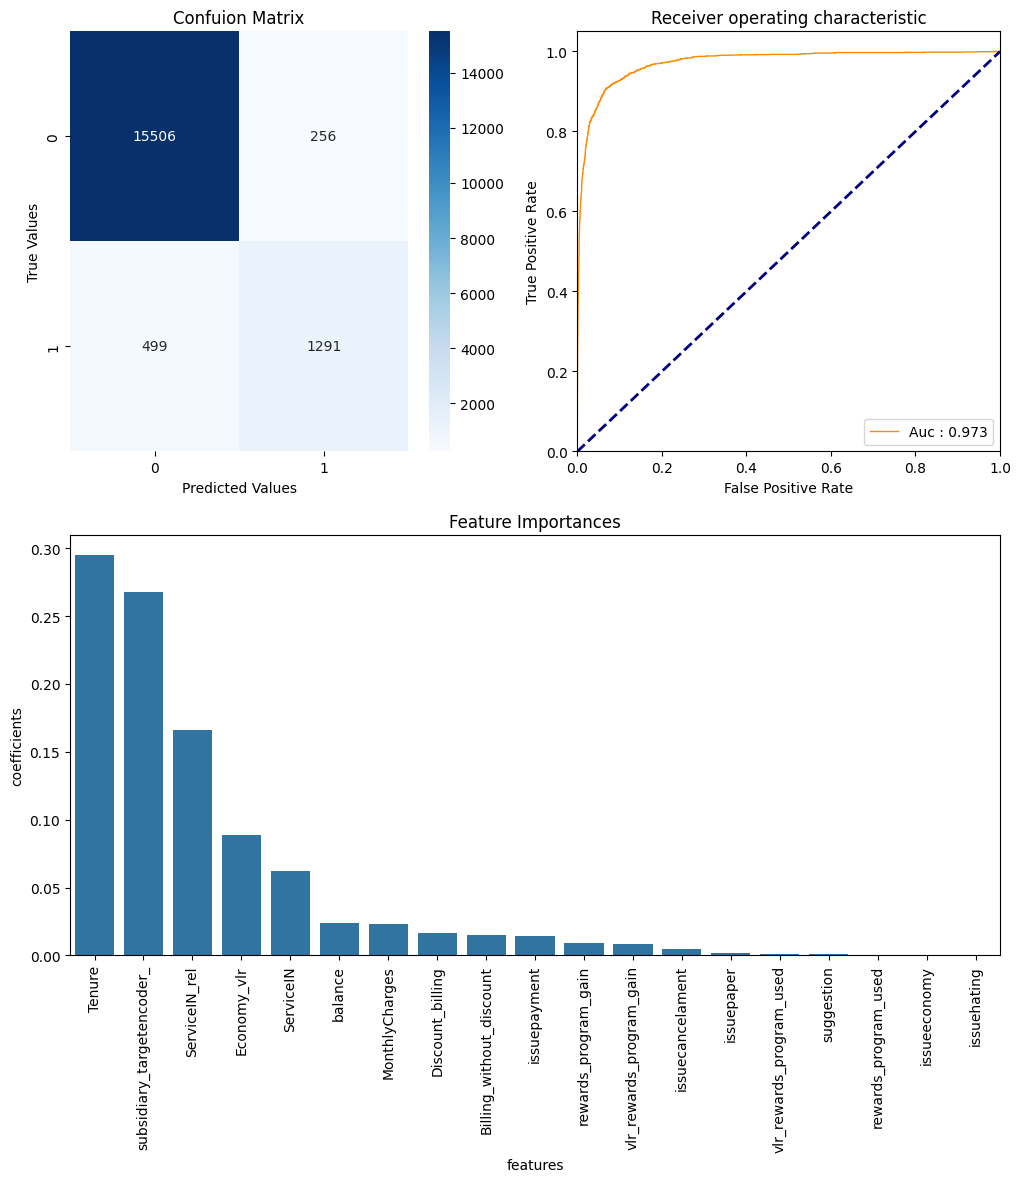

In [78]:
churn_prediction(model, train_x, train_y, test_x, test_y, x,"features")

## FIM